# Эволюционные методы

## Выпуклые и невыпуклые задачи

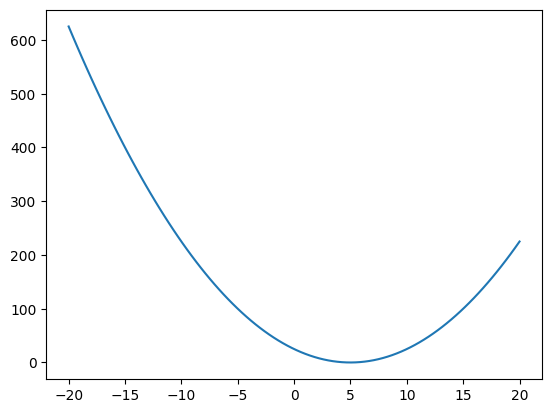

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f1(x):
  return (x-5)**2
x=np.linspace(-20,20,100)
plt.plot(x,f1(x))
plt.show()

### Перебор по сетке

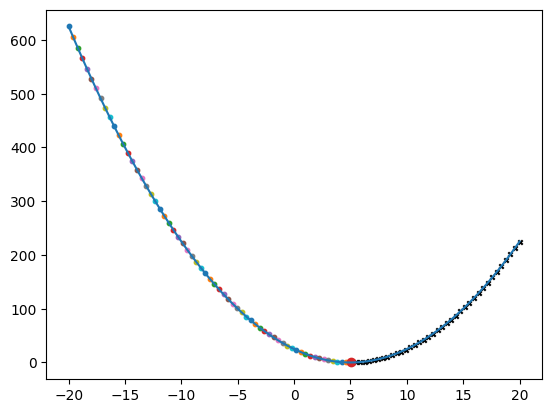

In [31]:
min_x=1e100
min_f=1e100
for i in range(x.shape[0]):
 if f1(x[i])<min_f:
  min_f=f1(x[i])
  min_x=x[i]
  plt.scatter(min_x,min_f,s=10)
 else:
  plt.scatter(x[i],f1(x[i]),marker='x',s=10,c='k')
     
plt.plot(x,f1(x))
plt.scatter(min_x,min_f)
plt.show()

### Выпуклая задача

### Градиентный спуск

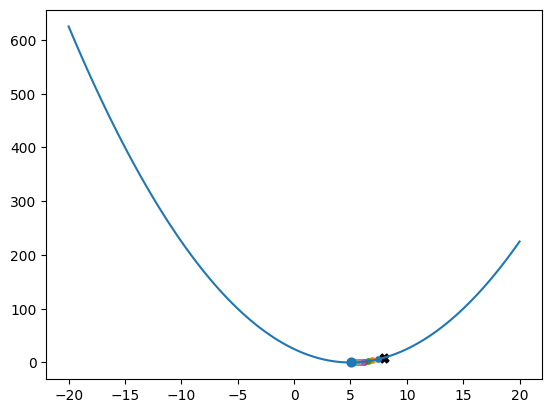

In [32]:
eps=0.001
def df1(x):
  return (f1(x+eps/2)-f1(x-eps/2))/eps
min_x=np.random.randint(x.min(),x.max())
min_f=f1(min_x)
plt.scatter(min_x,min_f,marker='X',s=40,c='k')
alpha=0.1
ITTS=20
for i in range(ITTS):
  min_x=min_x-alpha*df1(min_x)
  min_f=f1(min_x)
  plt.scatter(min_x,min_f,s=15)
plt.plot(x,f1(x))
plt.scatter(min_x,min_f,s=40)
plt.show()

### Невыпуклая задача

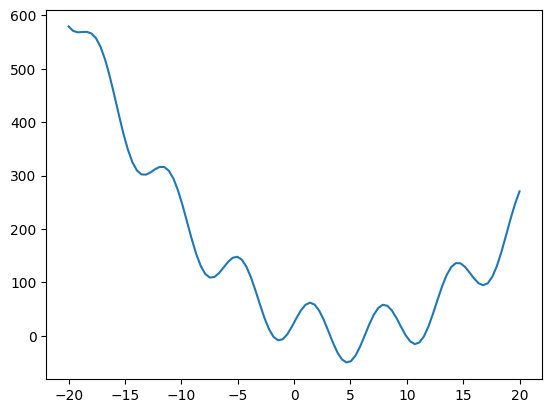

In [23]:
def f2(x):
  return (x-5)**2+50*np.sin(x)
x=np.linspace(-20,20,100)
plt.plot(x,f2(x))
plt.show()

### Минимумы - локальные и глобальные

### Перебор по сетке - глобальный минимум

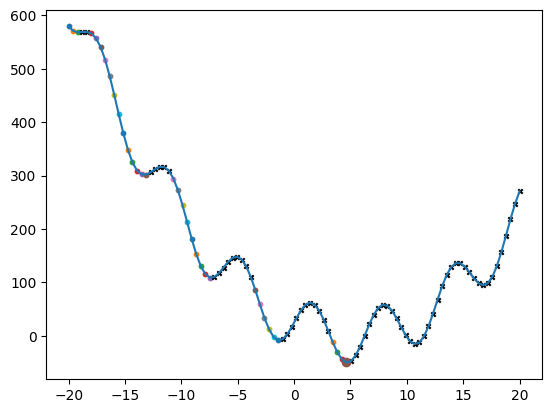

In [27]:
min_x=1e100
min_f=1e100
for i in range(x.shape[0]):
 if f2(x[i])<min_f:
  min_f=f2(x[i])
  min_x=x[i]
  plt.scatter(min_x,min_f,s=10)
 else:
  plt.scatter(x[i],f2(x[i]),marker='x',c='k',s=10)
     
plt.plot(x,f2(x))
plt.scatter(min_x,min_f)
plt.show()

### Градиентный спуск - локальный минимум

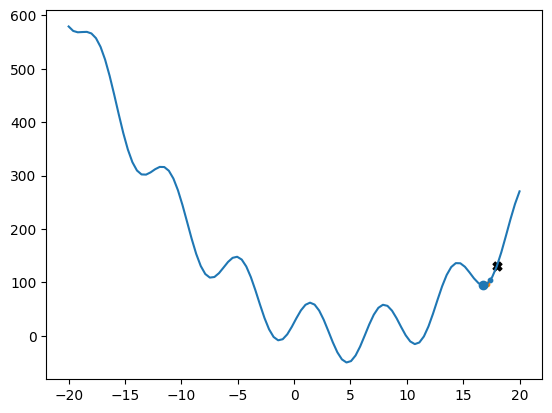

In [30]:
def df2(x):
  return (f2(x+eps/2)-f2(x-eps/2))/eps
np.random.seed(42)
min_x=np.random.randint(x.min(),x.max())
min_f=f2(min_x)
plt.scatter(min_x,min_f,marker='X',c='k',s=40)

ITTS=20
alpha=0.01
eps=0.1
for i in range(ITTS):
  min_x=min_x-alpha*df2(min_x)
  min_f=f2(min_x)
  plt.scatter(min_x,min_f,s=10)
plt.plot(x,f2(x))
plt.scatter(min_x,min_f)
plt.show()

### Как быстро найти глобальный минимум?

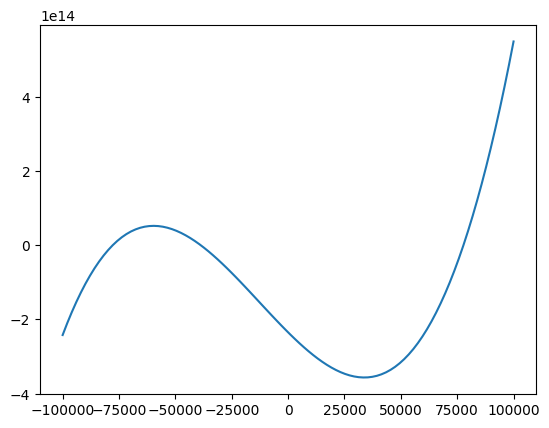

In [33]:
def f3(x):
  return (x**3  + 38780*x**2  - 6049339727*x - 234584303400174)+1e10*np.sin(x)
x=np.linspace(-100000,100000,100)
plt.plot(x,f3(x))

### Если функция достаточно гладкая - метод последовательных приближений

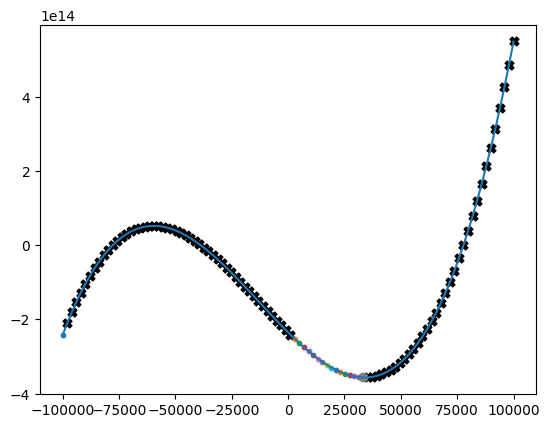

minimum: 33333.333333333314


In [54]:
min_x=1e100
min_f=1e100
for i in range(x.shape[0]):
 if f3(x[i])<min_f:
  min_f=f3(x[i])
  min_x=x[i]
  plt.scatter(min_x,min_f,s=10)
 else:
  plt.scatter(x[i],f3(x[i]),marker='X',c='k',s=40)
plt.plot(x,f3(x))
plt.scatter(min_x,min_f)
plt.show()
print('minimum:',min_x)

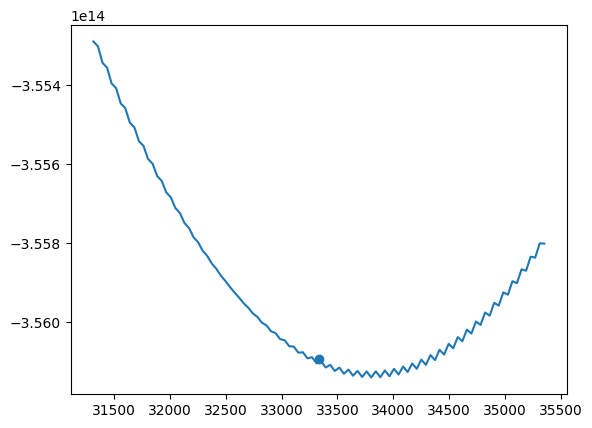

In [55]:
dx=abs(x[1]-x[0])
x1=np.linspace(min_x-dx,min_x+dx,100)
plt.scatter(min_x,min_f)
plt.plot(x1,f3(x1))

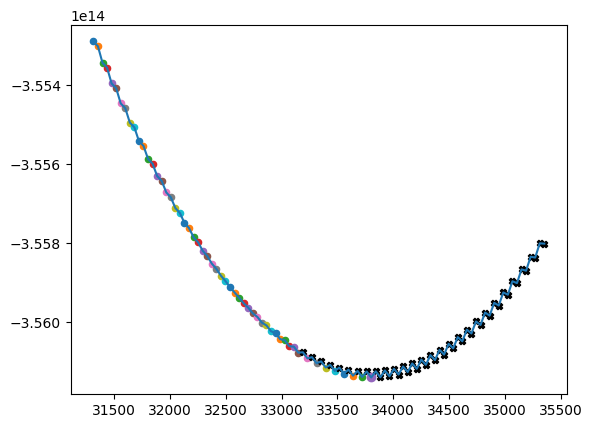

minimum: 33802.67319661257


In [56]:
min_x=1e100
min_f=1e100
for i in range(x1.shape[0]):
 if f3(x1[i])<min_f:
  min_f=f3(x1[i])
  min_x=x1[i]
  plt.scatter(min_x,min_f,s=20)
 else:
  plt.scatter(x1[i],f3(x1[i]),c='k',marker='X',s=20)
     
plt.plot(x1,f3(x1))
plt.scatter(min_x,min_f)
plt.show()
print('minimum:',min_x)

33802.67319661257 40.81216202428186


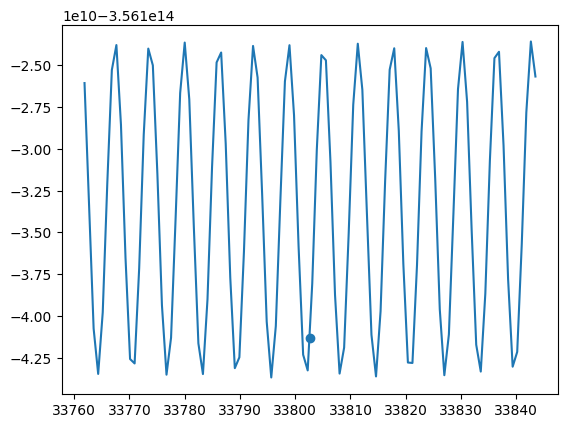

In [57]:
dx1=abs(x1[1]-x1[0])
print(min_x,dx1)
x2=np.linspace(min_x-dx1,min_x+dx1,100)
plt.scatter(min_x,min_f)
plt.plot(x2,f3(x2))

minimum: 33333.333333333314 -356094434994615.5 in [ -66666.66666666669 133333.3333333333 ]
minimum: 33802.67319661257 -356141294163269.0 in [ 31782.471176410552 35822.875216814595 ]
minimum: 33795.6650475781 -356143684600805.1 in [ 33754.85288555382 33836.47720960238 ]
minimum: 33795.69003206663 -356143686000274.7 in [ 33794.86554394493 33796.514520188335 ]
minimum: 33795.68313399235 -356143686237701.1 in [ 33795.66647766666 33795.699790318045 ]
minimum: 33795.68313739126 -356143686237701.4 in [ 33795.68280089983 33795.68347388269 ]
minimum: 33795.68314034384 -356143686237701.5 in [ 33795.68313354604 33795.683147141644 ]
minimum: 33795.68314034384 -356143686237701.5 in [ 33795.683140206515 33795.68314048117 ]
minimum: 33795.68314034384 -356143686237701.5 in [ 33795.68314034107 33795.68314034661 ]
minimum: 33795.68314034384 -356143686237701.5 in [ 33795.68314034378 33795.6831403439 ]


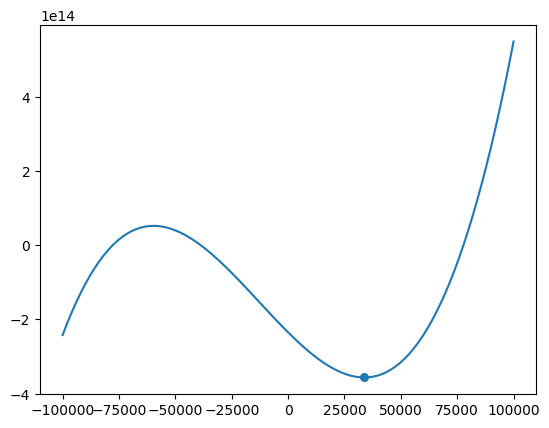

In [58]:
x1=x.copy()
dx=100000
min_x=0
min_f=f3(min_x)
for itt in range(10):
 x1=np.linspace(min_x-dx,min_x+dx,100)
 for i in range(x1.shape[0]):
  if f3(x1[i])<min_f:
   min_f=f3(x1[i])
   min_x=x1[i]
 print('minimum:',min_x,min_f,'in [',min_x-dx,min_x+dx,']')
 dx=x1[1]-x1[0]
plt.plot(x,f3(x))
plt.scatter(min_x,f3(min_x),s=30)

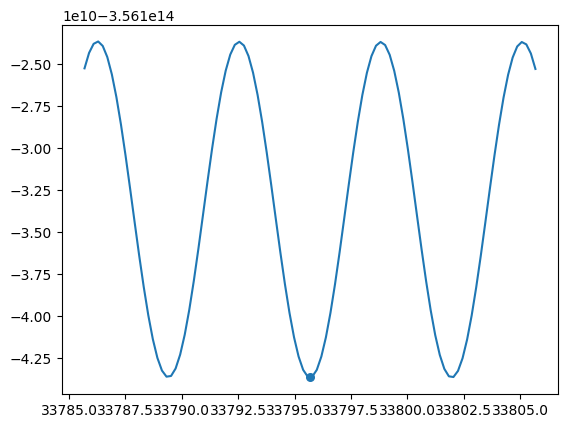

In [61]:
x=np.linspace(min_x-10,min_x+10,100)
plt.plot(x,f3(x))
plt.scatter(min_x,f3(min_x),s=30)

### Можно-ли взять сетку неэквидистантной?

# Методы Монте-Карло

### Определение числа π

In [62]:
def inCircle(x,y):
  if x**2+y**2<1:
    return True
  else:
    return False

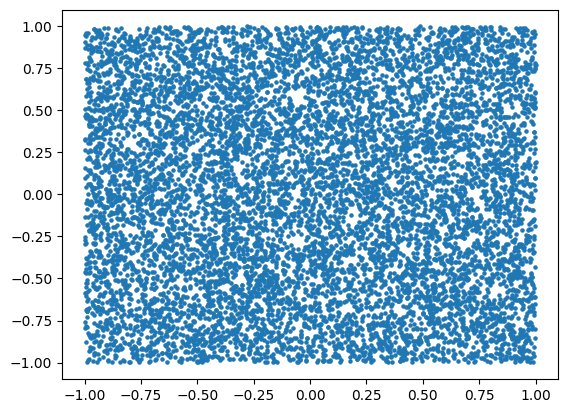

In [64]:
N=10000
x=np.random.rand(N,2)*2-1
plt.scatter(x[:,0],x[:,1],s=5)



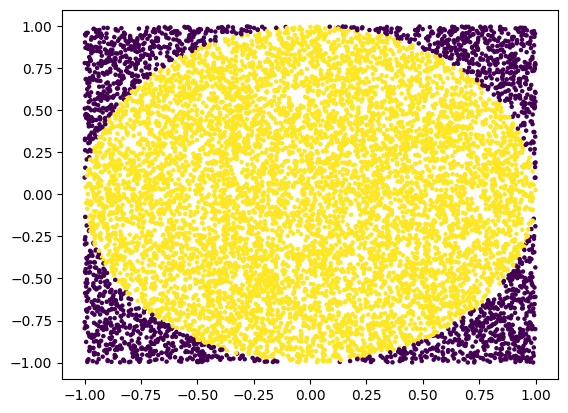

In [65]:
c=np.zeros(x.shape[0])
for i in range(x.shape[0]):
 c[i]=inCircle(x[i,0],x[i,1])
plt.scatter(x[:,0],x[:,1],c=c,s=5)

In [66]:
print(c.shape,c.astype(int).sum()/c.shape)

(10000,) [0.7868]


### А чему она равна теоретически?

In [68]:
N=10000000
x=np.random.rand(N,2)*2-1
c=np.zeros(x.shape[0])
for i in range(x.shape[0]):
 c[i]=inCircle(x[i,0],x[i,1])
print(c.astype(int).sum()/float(c.shape[0]))

0.785463


In [69]:
print(4*c.astype(int).sum()/float(c.shape[0]))

3.141852


## Задание: найти N при котором число π будет вычисляться этим методом с точностью до 3го знака после запятой.

## Поиск минимума методом Монте-Карло (метод научного тыка)

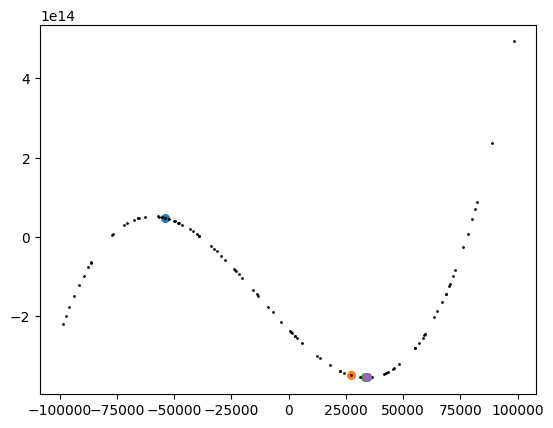

minimum: 34144.49507982872 -356107228763679.6


In [74]:
N=100
lower_x=-1e5
upper_x=1e5
min_f=1e100
min_x=1e100
x1=[]
for i in range(N):
 x=lower_x+np.random.rand()*(upper_x-lower_x)
 x1.append(x)
 if f3(x1[i])<min_f:
  min_f=f3(x1[i])
  min_x=x1[i]
  plt.scatter(min_x,min_f,s=30)
     
x1=np.array(x1)
plt.scatter(x1,f3(x1),s=1,c='k')
plt.scatter(min_x,min_f,s=30)
plt.show()
print('minimum:',min_x,min_f)

## Объединение поиска по сетке и метода Монте-Карло: метод отжига

Проблема:
- как определять пределы изменения следующей иттерации

### Метод отжига

- Пределы изменения следующей иттерации по x - T ("температура")
- От нее требуется уменьшение от иттерации к иттерации ("охлаждение")
- Точки внутри пределов выбрасываем случайно ("методом Монте-Карло")

#### Одна иттерация

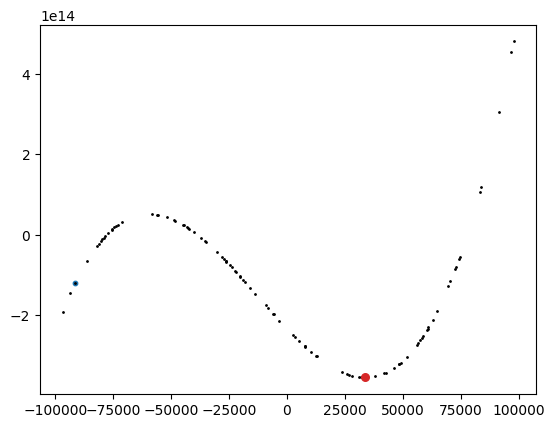

minimum: 33598.42127829691 -356119995744586.3


In [87]:
N=100
mid_x=0
Temp=1e5
min_x=1e100
min_f=1e100
x1=mid_x+(np.random.rand(N)-0.5)*Temp*2
for i in range(x1.shape[0]):
 if f3(x1[i])<min_f:
  min_f=f3(x1[i])
  min_x=x1[i]
  plt.scatter(min_x,min_f,s=10)
plt.scatter(x1,f3(x1),s=1,c='k')
plt.scatter(min_x,min_f,s=30)
plt.show()
print('minimum:',min_x,min_f)

#### Много иттераций

minimum: 33934.07686374921 -356141100652585.2


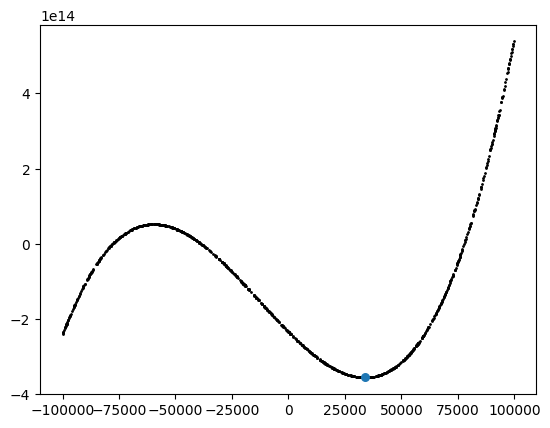

In [89]:
N=1000
mid_x=0
Temp=1e5

for itt in range(1):  #+
 min_x=1e100
 min_f=1e100
 x1=mid_x+(np.random.rand(N)-0.5)*Temp*2
 for i in range(x1.shape[0]):
  if f3(x1[i])<min_f:
   min_f=f3(x1[i])
   min_x=x1[i]
 mid_x=min_x  #+
 Temp/=10     #+
print('minimum:',min_x,min_f)
plt.scatter(x1,f3(x1),s=1,c='k')
plt.scatter(min_x,min_f,s=30)
plt.show()


minimum: 33801.966149685875 -356143691397675.06


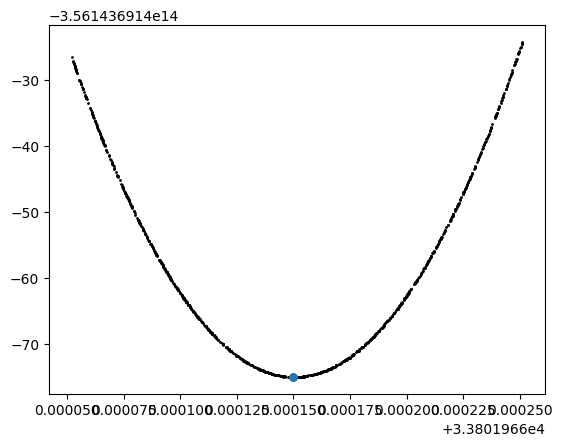

In [91]:
N=1000
mid_x=0
Temp=1e5

for itt in range(10):  #+
 min_x=1e100
 min_f=1e100
 x1=mid_x+(np.random.rand(N)-0.5)*Temp*2
 for i in range(x1.shape[0]):
  if f3(x1[i])<min_f:
   min_f=f3(x1[i])
   min_x=x1[i]
 mid_x=min_x  
 Temp/=10    
print('minimum:',min_x,min_f)
plt.scatter(x1,f3(x1),s=1,c='k')
plt.scatter(min_x,min_f,s=30)
plt.show()

## Проблема: а если функция невыпуклая и минимумы почти одинаковы по глубине?

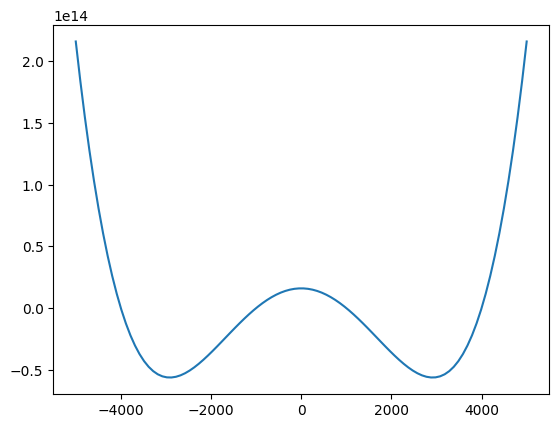

In [92]:
def f4(x):
  return (x-4000)*(x+4000)*(x-1000)*(x+1000)+x
x=np.linspace(-5000,5000,100)
plt.plot(x,f4(x))

minimum: 2914.320715174176 -56249954639970.76


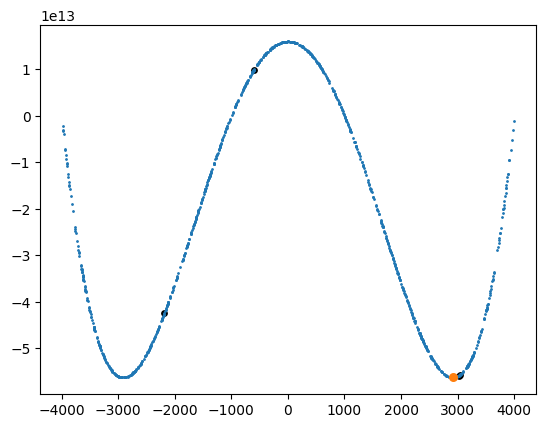

In [98]:
N=1000
mid_x=0
Temp=4*1e3 #+

for itt in range(1):
 min_x=1e100
 min_f=1e100
 x1=mid_x+(np.random.rand(N)-0.5)*Temp*2
 for i in range(x1.shape[0]):
  if f4(x1[i])<min_f: #+
   min_f=f4(x1[i]) #+
   min_x=x1[i]
   plt.scatter(min_x,min_f,s=15,c='k')
   
 mid_x=min_x
 Temp/=10
print('minimum:',min_x,min_f)
plt.scatter(x1,f4(x1),s=1) #+
plt.scatter(min_x,min_f,s=30)
plt.show()

minimum: -2915.47594105039 -56250000002915.484


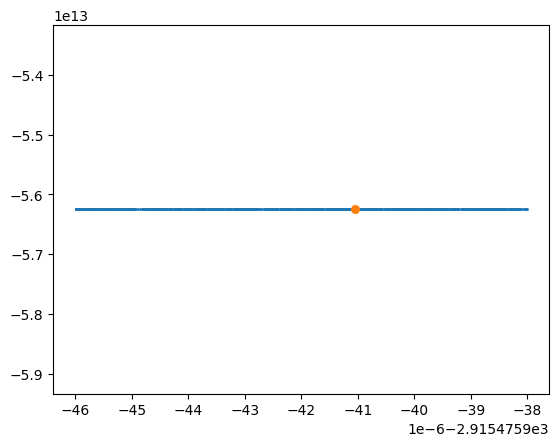

In [99]:
N=1000
mid_x=0
Temp=4*1e3 #+

for itt in range(10): #+
 min_x=1e100
 min_f=1e100
 x1=mid_x+(np.random.rand(N)-0.5)*Temp*2
 for i in range(x1.shape[0]):
  if f4(x1[i])<min_f: #+
   min_f=f4(x1[i]) #+
   min_x=x1[i]
#   plt.scatter(min_x,min_f,s=15,c='k') #-
   
 mid_x=min_x
 Temp/=10
print('minimum:',min_x,min_f)
plt.scatter(x1,f4(x1),s=1) #+
plt.scatter(min_x,min_f,s=30)
plt.show()

### Проблема: при поиске минимума мы учитываем только одну точку и область вокруг нее.

То-есть мы все-равно ищем локальный минимум, а не глобальный, и в случае почти одинаковых по глубине минимумов будем ошибаться

## Эволюционные алгоритмы

Условия
- мы должны хранить информацию о многих возможных минимумах, ориентируясь на их глубину, а не на положение;
- мы должны искать новые возможные минимумы;
- мы должны анализировать области вокруг этих минимумов, и эти области должны сужаться от иттерации к иттерации;

### Решение

**Возможные минимумы - популяция**

### Генетический алгоритм:

Используем алгоритм естественного отбора

Создать начальную популяцию

(Начало цикла)
*  Размножение/скрещивание
*  Мутация
*  Cелекция/отбор лучших
*  Если выполняются условия остановки, то (конец цикла), иначе (начало цикла).



### Простой пример

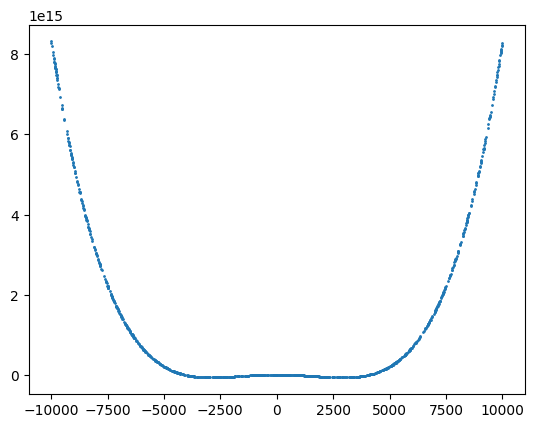

In [106]:
import numpy as np
def initGA(lower_x,upper_x,popN=1000):
 x=lower_x+np.random.rand(popN)*(upper_x-lower_x)
 return x
population=initGA(-1e4,1e4)
# print(population)
plt.scatter(population,f4(population),s=1)
plt.show()

In [107]:
def lossGA(x):
  return f4(x)
print(lossGA(population)[:10])

[-2.20140896e+13  1.28022574e+15  1.26097454e+15  2.08540962e+15
  2.41701409e+13 -5.61998001e+13  1.76584497e+15  9.35263297e+14
 -1.92262573e+12  1.71775461e+15]


[ 2915.4528042   2912.06020074 -2953.65083487  2876.78471345
 -2839.196191    2993.51447574 -2835.1398821  -2834.40977472
 -2833.74609491 -3002.36892895]
[-5.62500000e+13 -5.62496038e+13 -5.61998001e+13 -5.61997748e+13
 -5.60573097e+13 -5.60373601e+13 -5.60365728e+13 -5.60327310e+13
 -5.60292099e+13 -5.59855786e+13]


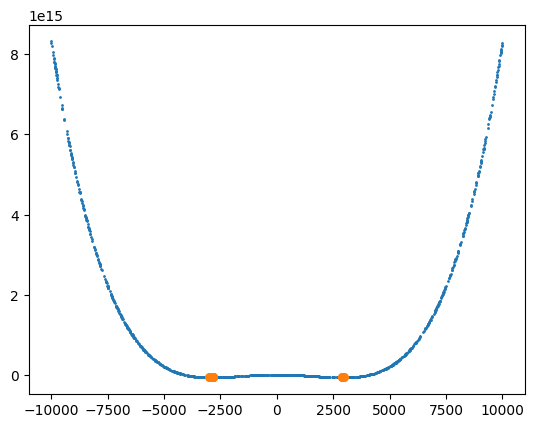

In [109]:
def selectGA(x,topN=30):
  losses=lossGA(x)
  sorted = losses.argsort()
  return (x[sorted])[:topN],losses[sorted][:topN]
xbest,losses=selectGA(population)
print(xbest[:10])
print(losses[:10])
plt.scatter(population,f4(population),s=1)
plt.scatter(xbest[:10],f4(xbest[:10]),s=30)
plt.show()

[ 2915.4528042   2912.06020074 -2953.65083487  2876.78471345
 -2839.196191    2993.51447574 -2835.1398821  -2834.40977472
 -2833.74609491 -3002.36892895]


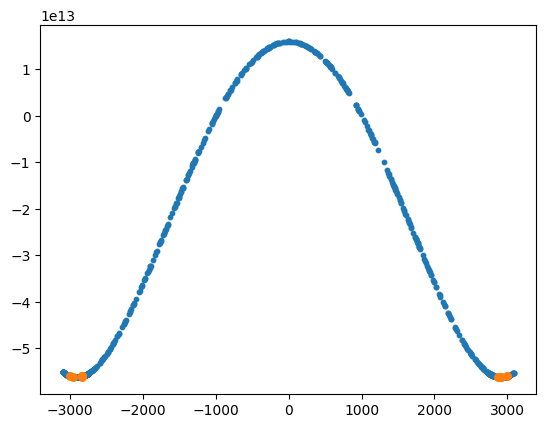

In [112]:
def crossoverGA(x,popN=1000):
  xnew=np.zeros(popN)
  for i in range(x.shape[0]):
    xnew[i]=x[i].copy()
  for i in range(x.shape[0],popN):
   idx=np.random.randint(0,x.shape[0],2)
   xnew[i]=x[idx[0]]+np.random.rand()*(x[idx[1]]-x[idx[0]])
  return xnew
x=crossoverGA(xbest)
print(x[:10])
plt.scatter(x,f4(x),s=10)
plt.scatter(xbest[:10],f4(xbest[:10]),s=30)
plt.show()

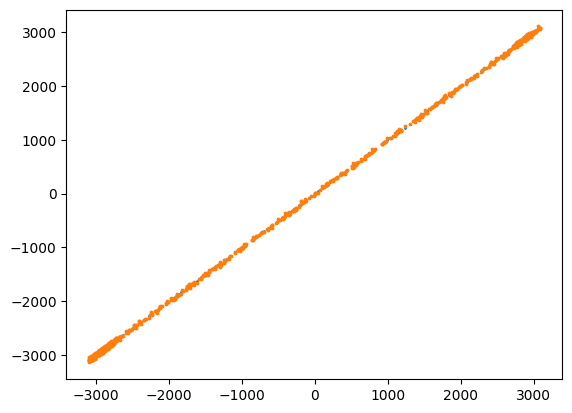

In [128]:
def mutateGA(x):
  xnew=x.copy()+np.random.randint(0,2,x.shape[0])*(np.random.rand(x.shape[0])-0.5)*100
  return xnew
xmut=mutateGA(x)
plt.scatter(x,x,s=1)
plt.scatter(x,xmut,s=3)
plt.show()

### Полный генетический алгоритм

[-2915.47594591 -2915.47594449 -2915.47594938 -2915.47594448
 -2915.47595065 -2915.47594669 -2915.47594553 -2915.47594826
 -2915.47594476 -2915.47594511 -2915.4759431  -2915.47594005
 -2915.475945   -2915.47594361 -2915.47595171 -2915.47595109
 -2915.47594477 -2915.47594512 -2915.4759463  -2915.47594708
 -2915.47594248 -2915.47594454 -2915.47594652 -2915.47594901
 -2915.47594926 -2915.4759449  -2915.47594541 -2915.4759431
 -2915.47595019 -2915.47594748]


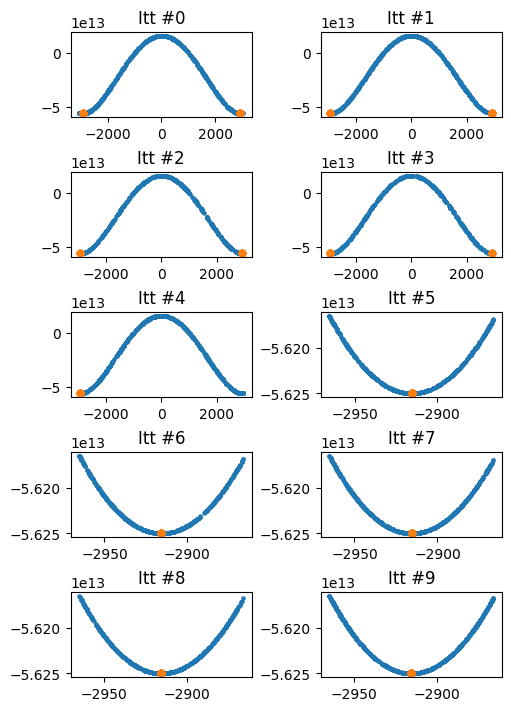

In [143]:
population=initGA(-1e4,1e4)
ITT=10
fig,axs=plt.subplots(ITT//2,2,constrained_layout=True,figsize=(5,7))
for itt in range(ITT):
  xbest,losses=selectGA(population)
#  print(xbest[:4])
  population=crossoverGA(xbest)
  population[xbest.shape[0]:]=mutateGA(population[xbest.shape[0]:])
  
  axs[itt//2,itt%2].scatter(population,f4(population),s=5)
  axs[itt//2,itt%2].set_title('Itt #'+str(itt))
  if itt>0:
   axs[(itt-1)//2,(itt-1)%2].scatter(population[:xbest.shape[0]],f4(population[:xbest.shape[0]]),s=20)

print(xbest)
axs[(itt)//2,(itt)%2].scatter(xbest,f4(xbest),s=20)


# Моделирование человеческого общества. Моральные принципы.

## Награда в теории игр

## Парадокс заключенного

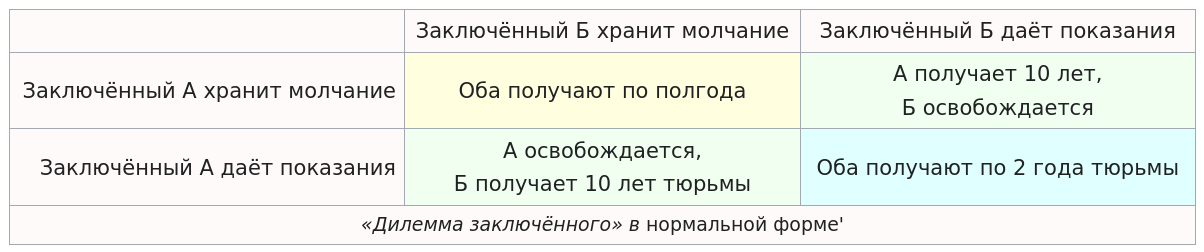

## Оптимум по Нэшу

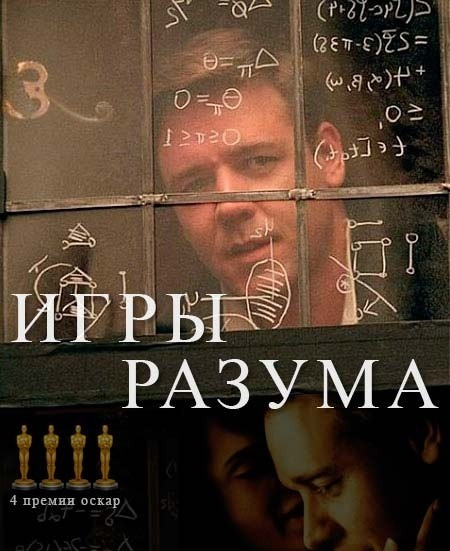

Стратегия при которой ни один участник не может увеличить свой выигрыш, изменив свою стратегию, если другие участники своих стратегий не меняют

**Оптимальное по Нэшу решение:**

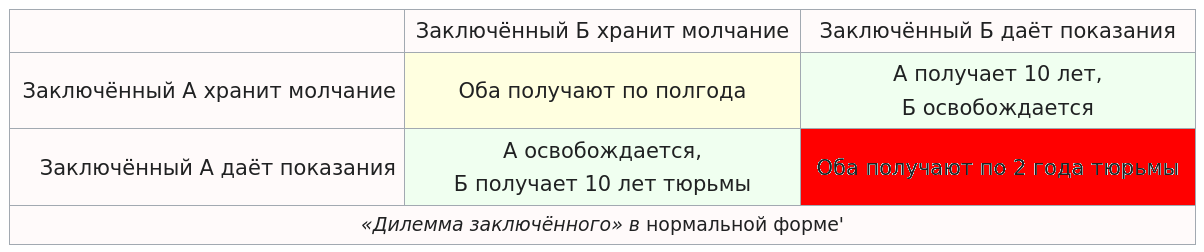

##  Оптимум по Паретто

Cостояние системы, при котором ни один показатель системы не может быть улучшен без ухудшения какого-либо другого показателя.

Всякое изменение, которое никому не приносит убытков, а некоторым людям приносит пользу (по их собственной оценке), является улучшением

**Оптимальные по Паретто решения**

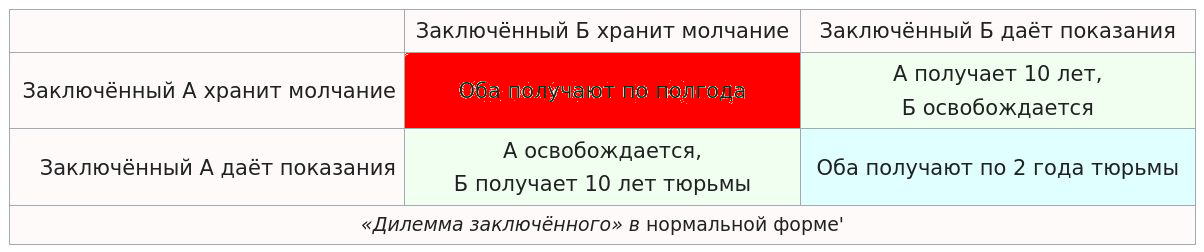

Найдем оптимальную стратегию поведения, если кругом люди с произвольными стратегиями

**Вероятностная стратегия без памяти:**
- стратегия имеет вид вероятности принятия того или другого решения
- вы не знаете, какие решения принимал другой человек раньше
- все кругом вас принимают решения случайно (но у них есть свои стратегии)

In [144]:
import numpy as np
import sys
HIST_LEN=1
ValueArray=np.array([[[0.5,0.5],[10,0]],[[0,10],[3,3]]])

In [145]:
# my personal strategy
class makeModel():
 def __init__(self, coefs):
  self.coefs=coefs # coefs - response probability
  self.rating=0

 def setRating(self,rating):
  self.rating=rating

 def getRating(self):
  return self.rating

 def reply(self):
  s_other=0
  reply_p=self.coefs[int(s_other)]
  if np.random.rand()<reply_p:
   return 1
  else:
   return 0


In [146]:
# get loss
def getLoss(solver_mine, solver_other):
 predict_mine=solver_mine.reply()
 predict_other=solver_other.reply()
 predictV=ValueArray[predict_mine,predict_other,0]
 predictV_other=ValueArray[predict_other,predict_mine,0]
 return predictV,predictV_other,predict_mine,predict_other

In [147]:
# get mean loss over 20 games with same person
def getIntegralLoss(solver_mine, solver_other):
 V,Vother=0,0
 N=20
 s=0
 for i in range(N):
  predictV,predictV_other,predict_mine,predict_other=getLoss(solver_mine, solver_other)
  V+=predictV
  Vother+=predictV_other
  s+=1
 return V/s,Vother/s


In [148]:
# crossover solutions
def crossoverSolutions(solution1,solution2,alpha=0.0):

 #crossover
 mix=np.random.randint(0,1,size=solution1.coefs.shape)
 new_solution=makeModel(solution1.coefs)
 new_solution.coefs=new_solution.coefs*mix+solution2.coefs*(1-mix)
 p1=np.ones(solution1.coefs.shape[0])
 new_solution.coefs+=p1*(np.random.rand(solution1.coefs.shape[0])-0.5)*alpha

 #random mutate
 for i in range(solution1.coefs.shape[0]):
  if np.random.rand()<1/solution1.coefs.shape[0]:
   new_solution.coefs[i]+=(np.random.rand()-0.5)*alpha
 new_solution.coefs[new_solution.coefs<0]=0.
 new_solution.coefs[new_solution.coefs>1]=1.

 return new_solution

In [149]:
# select solutions
def sortModels(models):
 p=[0]*len(models)
 for i in range(len(models)):
  p[i]=[i,models[i].getRating()]
 p=np.array(p)
 p=p[p[:,1].argsort()]
 new_models=[0]*len(models)
 for i in range(len(models)):
  new_models[i]=models[int(p[i,0])]
 return new_models

In [150]:
hist_len=HIST_LEN
Animals=100
coefs_size=1
coefs,models,fixed_models=[0]*Animals,[0]*Animals,[0]*Animals

opt_coefs=np.random.rand(coefs_size)
MaxItt=20

# models to compare strategies
for i in range(Animals):
 coefs[i]=np.random.rand(coefs_size)
 fixed_models[i]=makeModel(coefs[i])

# make initial population
for i in range(Animals):
 coefs[i]=np.random.rand(coefs_size)
 models[i]=makeModel(coefs[i])

for itt in range(MaxItt):

 # select Best animals
 Vs=[0]*Animals
 for i in  range(Animals):
  for j in  range(Animals):
    V,Vother=getIntegralLoss(models[i], fixed_models[j])
    Vs[i]+=V
  models[i].setRating(Vs[i]/(Animals))
 models=sortModels(models)

# crossover and mutate
 for i in range(len(models)*2//4,len(models)*4//4):
   j=np.random.randint(0,len(models)//4)
   models[i]=crossoverSolutions(models[j],models[i],0.5)
# print(' intLosses: ',(np.array(Vs)/(Animals))[:5])
 opt_coefs=models[0].coefs.copy()
 coefs[1]=models[0].coefs.copy()

    
 print(itt,'opt coefs: ',np.round(opt_coefs,3))


0 opt coefs:  [0.992]
1 opt coefs:  [0.992]
2 opt coefs:  [0.992]
3 opt coefs:  [0.992]
4 opt coefs:  [0.992]
5 opt coefs:  [1.]
6 opt coefs:  [1.]
7 opt coefs:  [1.]
8 opt coefs:  [1.]
9 opt coefs:  [1.]
10 opt coefs:  [1.]
11 opt coefs:  [1.]
12 opt coefs:  [1.]
13 opt coefs:  [1.]
14 opt coefs:  [1.]
15 opt coefs:  [1.]
16 opt coefs:  [1.]
17 opt coefs:  [1.]
18 opt coefs:  [1.]
19 opt coefs:  [1.]


**Основная стратегия вашего поведения в таком обществе - предательство!**

Таким образом, вы выбираете стратегию оптимальную по Нэшу

### Усложним общество:

В обществе половина людей поступает случайно, а вторая половина - также, как вы (ведь половина людей не глупее вас, и тоже адаптирует свою стратегию).

Какова ваша оптимальная стартегия?

In [151]:
hist_len=HIST_LEN
Animals=100
coefs_size=1
coefs,models,fixed_models=[0]*Animals,[0]*Animals,[0]*Animals

opt_coefs=np.random.rand(coefs_size)
MaxItt=20

# models to compare strategies
for i in range(Animals):
 coefs[i]=np.random.rand(coefs_size)
 fixed_models[i]=makeModel(coefs[i])

# make initial population
for i in range(Animals):
 coefs[i]=np.random.rand(coefs_size)
 models[i]=makeModel(coefs[i])

for itt in range(MaxItt):

 # select Best animals
 Vs=[0]*Animals
 for i in  range(Animals):
  for j in  range(Animals):
    if j<Animals//2:                                      #+
     V,Vother=getIntegralLoss(models[i], fixed_models[j]) #+
    else:                                                 #+
     V,Vother=getIntegralLoss(models[i], models[i])       #+

    Vs[i]+=V
  models[i].setRating(Vs[i]/(Animals))
 models=sortModels(models)

# crossover and mutate
 for i in range(len(models)*2//4,len(models)*4//4):
   j=np.random.randint(0,len(models)//4)
   models[i]=crossoverSolutions(models[j],models[i],0.5)
# print(' intLosses: ',(np.array(Vs)/(Animals))[:5])
 opt_coefs=models[0].coefs.copy()
 coefs[1]=models[0].coefs.copy()

 print(itt,'opt coefs: ',np.round(opt_coefs,3))


0 opt coefs:  [0.989]
1 opt coefs:  [0.989]
2 opt coefs:  [0.989]
3 opt coefs:  [1.]
4 opt coefs:  [1.]
5 opt coefs:  [1.]
6 opt coefs:  [1.]
7 opt coefs:  [1.]
8 opt coefs:  [1.]
9 opt coefs:  [1.]
10 opt coefs:  [1.]
11 opt coefs:  [1.]
12 opt coefs:  [1.]
13 opt coefs:  [1.]
14 opt coefs:  [1.]
15 opt coefs:  [1.]
16 opt coefs:  [1.]
17 opt coefs:  [1.]
18 opt coefs:  [1.]
19 opt coefs:  [1.]


**Основная стратегия человеческого поведения в обществе без информации - предательство!**

Таким образом, даже если половина людей действует как вы и не помнит или не знает предыдущих действий других людей - они будут выбирать стратегию оптимальную по Нэшу - всегда предавать.

**ВЫВОД: Общество без памяти с дилемой заключенного - это общество предателей.**

## Изменяем наше общество:
- Добавим в общество память о действиях других людей и построим  стратегию с учетом памяти о предыдущих действиях человека

In [152]:
def getLoss(hist_mine, hist_other, solver_mine, solver_other):
 predict_mine=solver_mine.reply(hist_other)
 predict_other=solver_other.reply(hist_mine)
 predictV=ValueArray[predict_mine,predict_other,0]
 predictV_other=ValueArray[predict_other,predict_mine,0]
 return predictV,predictV_other,predict_mine,predict_other

In [153]:
def getIntegralLoss(solver_mine, solver_other):
 hist_mine,hist_other=[],[]
 V,Vother=0,0
 N=20
 s=0
 for i in range(N):
  predictV,predictV_other,predict_mine,predict_other=getLoss(hist_mine, hist_other, solver_mine, solver_other)
  V+=predictV
  Vother+=predictV_other
  s+=1
  hist_mine.append(predict_mine)
  hist_other.append(predict_other)
 return V/s,Vother/s,hist_mine,hist_other


In [154]:

class makeModel():
 def __init__(self, coefs, history_len=3):
  self.coefs=coefs
  self.history_len=history_len
  self.rating=0

 def setRating(self,rating):
  self.rating=rating

 def getRating(self):
  return self.rating

 def reply(self,hist_other):
  hist_other_short=hist_other[-self.history_len:]
  s_mine,s_other=0,0
  for i in range(len(hist_other_short)):
   s_other+=(hist_other_short[i]+1)*3**i
  reply_p=self.coefs[int(s_other)]
  if np.random.rand()<reply_p:
   return 1
  else:
   return 0


In [155]:
def crossoverSolutions(solution1,solution2,alpha=0.0):
# crossover
 mix=np.random.randint(0,1,size=solution1.coefs.shape)
 new_solution=makeModel(solution1.coefs,solution1.history_len)
 new_solution.coefs=new_solution.coefs*mix+solution2.coefs*(1-mix)
 p1=np.ones(solution1.coefs.shape[0])

# mutate variant 1
 new_solution.coefs+=p1*(np.random.rand(solution1.coefs.shape[0])-0.5)*alpha
## mutate variant 2
# for i in range(solution1.coefs.shape[0]):
#  if np.random.rand()<1/solution1.coefs.shape[0]:
#   new_solution.coefs[i]+=(np.random.rand()-0.5)*alpha
 new_solution.coefs[new_solution.coefs<0]=0.
 new_solution.coefs[new_solution.coefs>1]=1.

 return new_solution


In [156]:
# select solutions
def sortModels(models):
 p=[0]*len(models)
 for i in range(len(models)):
  p[i]=[i,models[i].getRating()]
 p=np.array(p)
 p=p[p[:,1].argsort()]
 new_models=[0]*len(models)
 for i in range(len(models)):
  new_models[i]=models[int(p[i,0])]
 return new_models

In [160]:
hist_len=1 # HIST_LEN
Animals=300
coefs_size=3**(hist_len)
coefs,models,fixed_models=[0]*Animals,[0]*Animals,[0]*Animals

opt_coefs=np.random.rand(coefs_size)
MaxItt=100

# population to test your strategy
for i in range(Animals):
 coefs[i]=np.round(np.random.rand(coefs_size),1)
 fixed_models[i]=makeModel(coefs[i],hist_len)

# intial population
for i in range(Animals):
  coefs[i]=np.round(np.random.rand(coefs_size),1)
  models[i]=makeModel(coefs[i],hist_len)

for itt in range(MaxItt):


 Vs=[0]*Animals
# get Full Loss
 for i in  range(Animals):
  for j in  range(Animals):
     V,Vother,hist_mine,hist_other=getIntegralLoss(models[i], fixed_models[j])
     Vs[i]+=V
  models[i].setRating(Vs[i]/(Animals))
# select models
 models=sortModels(models)

 for i in range(1):
  print (i,models[i].rating,np.round(models[i].coefs,2),end='\t')
# print('=====')

 for i in range(len(models)*2//4,len(models)*4//4):
   j=np.random.randint(0,len(models)//4)
   models[i]=crossoverSolutions(models[j],models[i],0.5)

# print(' opt ',np.array(Vs)/(Animals))
 opt_coefs=models[0].coefs.copy()
 coefs[1]=models[0].coefs.copy()

 print('opt coefs: ',np.round(opt_coefs,3))
#print(V,"\n",hist_mine,"\n",hist_other,"\n",hist_V,"\n")



0 1.5761499999999988 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5665499999999997 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5703500000000008 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5917000000000006 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5653500000000018 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5612999999999997 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5677000000000003 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5837000000000019 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5933500000000005 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]
0 1.5664500000000015 [0.6 1.  1. ]	opt coefs:  [0.6 1.  1. ]


KeyboardInterrupt: 

**В обществе с памятью, где все поступают со случайными стратегиями и помнят ваши действия, наилучшая стратегия - при первой встрече не предавать, а при остальных - предавать.
Средняя потеря при такой стратегии - 1.5**

## Допустим, что остальные люди не глупее вас, и действуют с той-же стратегией, что и вы. Какова будет ваша оптимальная стратегия?

In [161]:
hist_len=1 # HIST_LEN
Animals=300
coefs_size=3**(hist_len)
coefs,models,fixed_models=[0]*Animals,[0]*Animals,[0]*Animals

opt_coefs=np.random.rand(coefs_size)
MaxItt=500

# population to test your strategy
for i in range(Animals):
 coefs[i]=np.round(np.random.rand(coefs_size),1)
 fixed_models[i]=makeModel(coefs[i],hist_len)

# intial population
for i in range(Animals):
  coefs[i]=np.round(np.random.rand(coefs_size),1)
  models[i]=makeModel(coefs[i],hist_len)

for itt in range(MaxItt):


 Vs=[0]*Animals
# get Full Loss
 for i in  range(Animals):
  for j in  range(Animals):
     if j<Animals//2:
      V,Vother,hist_mine,hist_other=getIntegralLoss(models[i], fixed_models[j])
     else:
      V,Vother,hist_mine,hist_other=getIntegralLoss(models[i], models[i])
     Vs[i]+=V
  models[i].setRating(Vs[i]/(Animals))
# select models
 models=sortModels(models)

 for i in range(1):
  print (i,models[i].rating,np.round(models[i].coefs,2),end='\t')
# print('=====')

 for i in range(len(models)*2//4,len(models)*4//4):
   j=np.random.randint(0,len(models)//4)
   models[i]=crossoverSolutions(models[j],models[i],0.5)

# print(' opt ',np.array(Vs)/(Animals))
 opt_coefs=models[0].coefs.copy()
 coefs[1]=models[0].coefs.copy()

 print('opt coefs: ',np.round(opt_coefs,3))
#print(V,"\n",hist_mine,"\n",hist_other,"\n",hist_V,"\n")



0 2.0944999999999996 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.0737500000000004 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.084666666666666 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.141083333333333 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.0887499999999983 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.10575 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.1420833333333325 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.1894166666666672 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.126083333333332 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.0605000000000007 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.024666666666667 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.03325 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.102916666666667 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.092916666666667 [0.13 0.   0.85]	opt coefs:  [0.128 0.    0.847]
0 2.0895833333333345 [0.13 0.   0.85]	opt coefs:  [0.128 0.    0.847]
0 2.033666666666667 [0.1 0.  0.9]	opt coefs:  [0.1 0.  0.9]
0 2.049083333333333 [0.1 0.  0.9]	o

KeyboardInterrupt: 

В обществе, где

- по крайней мере половина людей выбирают ту-же стратегию что и вы;  
- и имеют информацию и помнят о предыдущем действии других людей

основная стратегия поведения каждого умного эгоиста заключается в двух принципах:

- не предавай первым
- поступай с каждым так, как он поступил с тобой до этого ("око за око, зуб за зуб")

Таким образом, в обществе с памятью, оптимальным выбором стратегии половиной людей и дилеммой заключенного мы получаем первые **моральные принципы**.

**ВЫВОД: В обществе с памятью и информацией, а также с половиной разумных людей оптимальное решение принимается не по оптимуму Нэша (предательство), а по одному из оптимумов Паретто(поддержка).**


**Без памяти, информации или свободы выбора общество переходит в общество предателей**

**Как только половина людей осознает, что у них есть (1)память, (2)информированность и (3)возможность выбора стратегии, обществе возникает мораль, как оптимальная стратегия всеобщего эгоизма...**